In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 0. Installing Dependencies

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Loading Data

In [3]:
# 891 rows
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 418 rows
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2. EDA

In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_data.shape

(891, 12)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


null values of columns using missingno matrix

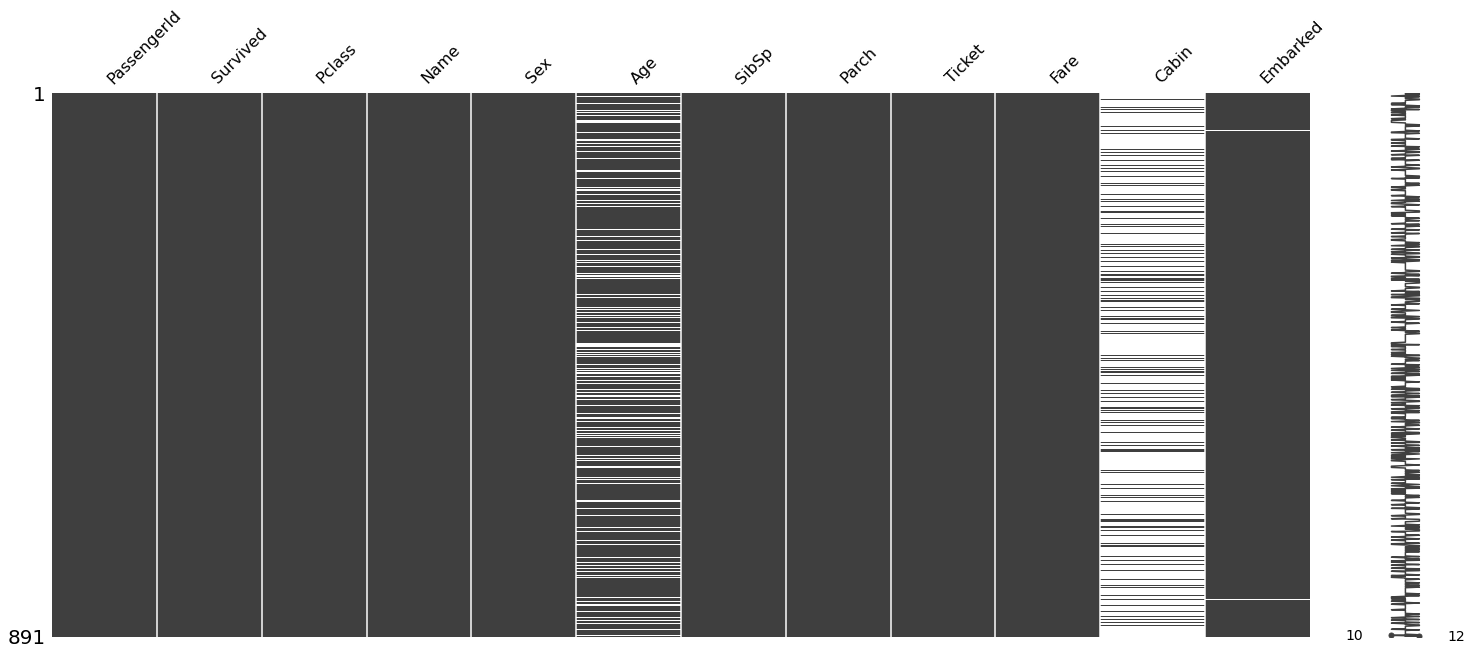

In [10]:
msn.matrix(train_data)
plt.show()

number of null values per col

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

null values using missingno bar

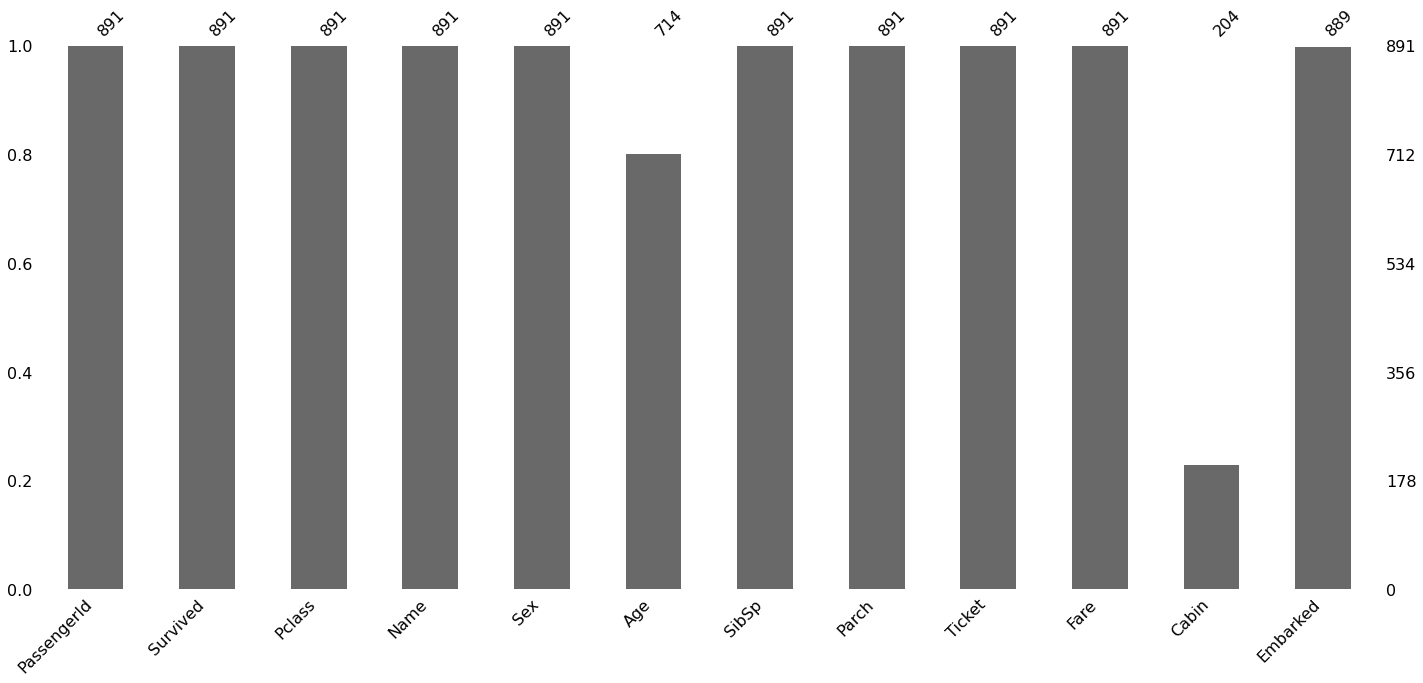

In [12]:
msn.bar(train_data)
plt.show()

percentage of null values of columns

In [13]:
train_data.isnull().sum()/train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

'cabin' column has many null values, hence dropping it

In [14]:
train_data.drop('Cabin', axis=1, inplace=True)

In [15]:
train_data_copy = train_data.copy()

In [16]:
# cabin dropped
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
# calc null values
train_data['Age'].isnull().sum()

177

In [18]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 2.1 Data Visualization

In [19]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Comparing % that survived wrt gender and gender_submission.csv (assumes all women survived)

74% of women survived and 19% of men died

In [20]:
# gets survival data of females (column)
women = train_data.loc[train_data.Sex == 'female']["Survived"]
# gets survival data of males (column)
men = train_data.loc[train_data.Sex == 'male']["Survived"]

# % of women that survived
percentage_women_survived = sum(women)/len(women)
# % of men that survived
percentage_men_survived = sum(men)/len(men)

print("% women survived:", percentage_women_survived)
print("% men survived:", percentage_men_survived)

% women survived: 0.7420382165605095
% men survived: 0.18890814558058924


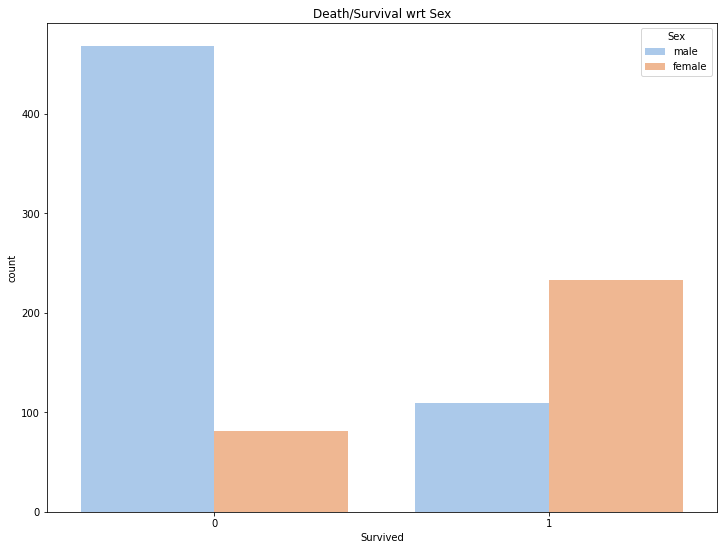

In [21]:
plt.figure(figsize=(12,9))
sns.set_palette('pastel')
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Death/Survival wrt Sex')
plt.show()

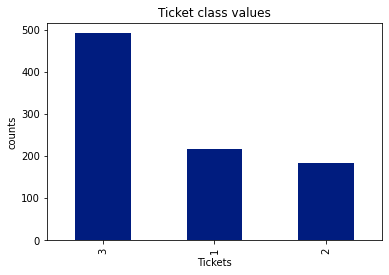

In [22]:
sns.set_palette('dark')
train_data['Pclass'].value_counts().plot.bar()
plt.title('Ticket class values')
plt.xlabel('Tickets')
plt.ylabel('counts')
plt.show()

In [23]:
ticket_class=train_data['Pclass'].value_counts()
print(ticket_class)

3    491
1    216
2    184
Name: Pclass, dtype: int64


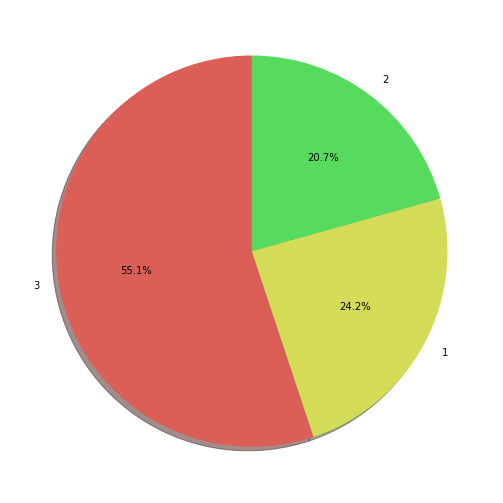

In [24]:
labels=ticket_class.index
sizes=ticket_class.values
plt.figure(figsize=(12,9))
colors=sns.color_palette('hls')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

Extracting Status from Name

In [25]:
status = train_data['Name'].map(lambda row: row.split(',')[1].split('.')[0])
status

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Name, Length: 891, dtype: object

In [26]:
# count of all status
statuscount = status.value_counts()
statuscount

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Name, dtype: int64

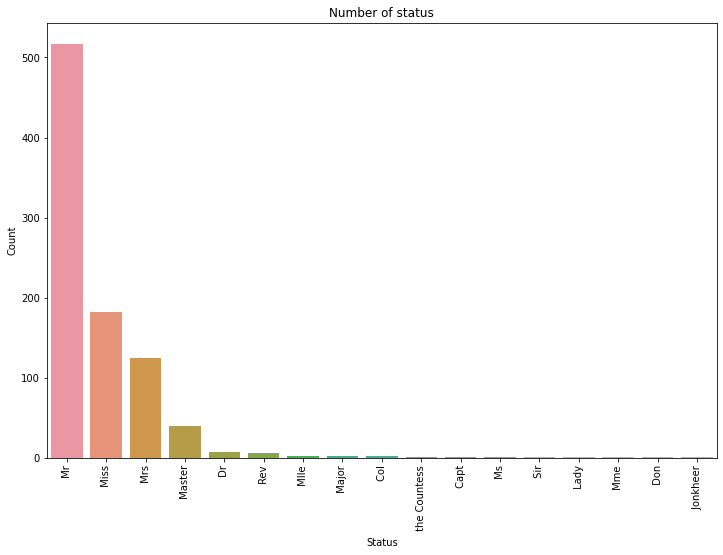

In [27]:
# plotting status count
plt.figure(figsize=(12, 8))
sns.barplot(x=statuscount.index, y=statuscount.values)
plt.title('Number of status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [28]:
train_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

Outliers using Box plot

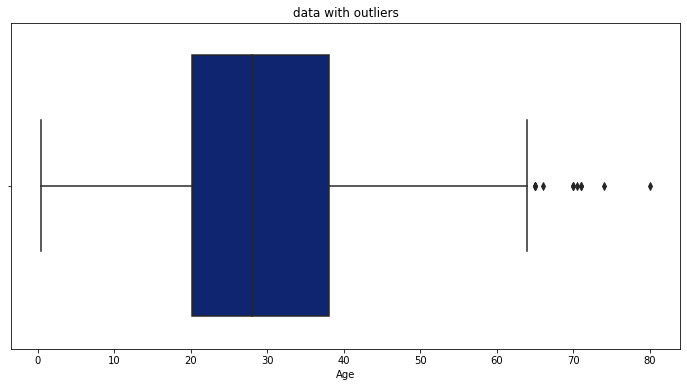

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(train_data['Age'])
plt.title('data with outliers')
plt.show()

In [30]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
train_data['Age'].median()

28.0

Remove `Age` outliers

In [32]:
def out_bound(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    return lower_bound, upper_bound

In [33]:
print(out_bound(train_data, 'Age'))

(-6.6875, 64.8125)


In [34]:
# skewness should be in range (-1, 1) for normal distribution
print('skewness : ', train_data.skew())

skewness :  PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


## Removing Outliers

In [35]:
def remove_outliers(df, col):
    l_b, u_b=out_bound(df, col)
    
    return df[ (df[col]>l_b) & (df[col]<u_b) ]

In [36]:
data1 = remove_outliers(train_data, 'Age')

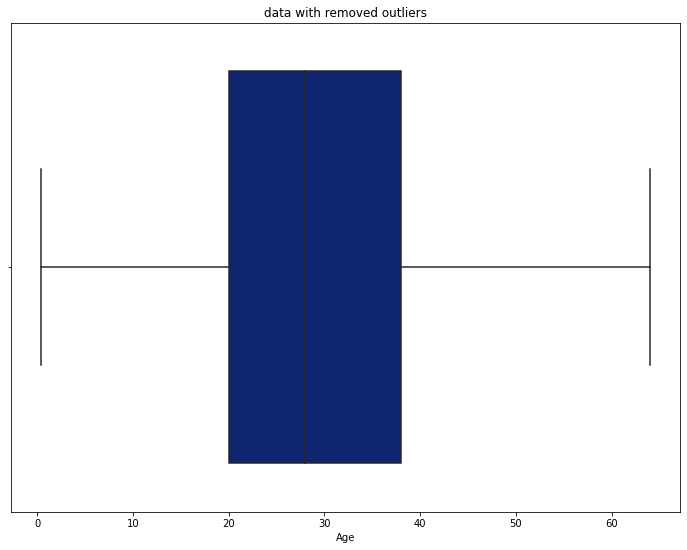

In [37]:
plt.figure(figsize=(12,9))
sns.boxplot(data1['Age'])
plt.title('data with removed outliers')
plt.show()

## Replacing Outliers

In [38]:
def outliers_equal_bounds(df, col):
    l_b, u_b=out_bound(df, col)
    
    df.loc[(df[col]<l_b), col]=l_b
    df.loc[(df[col]>u_b), col]=u_b
    
    return df

In [39]:
data2 = outliers_equal_bounds(train_data, 'Age')

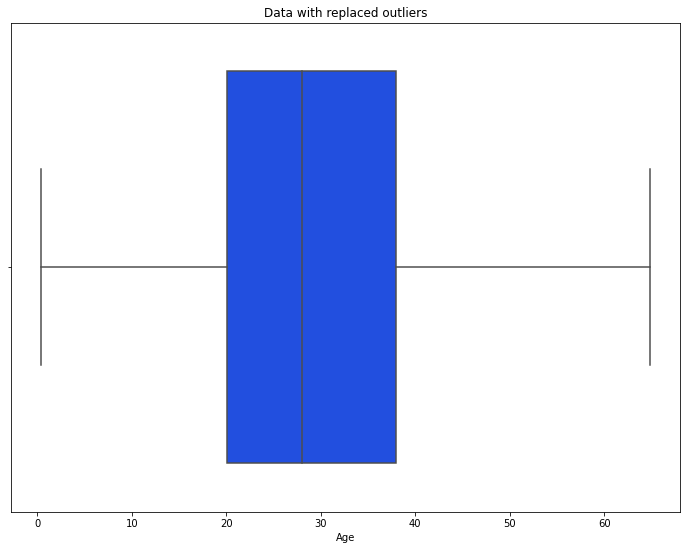

In [40]:
sns.set_palette('bright')
plt.figure(figsize=(12,9))
sns.boxplot(data2['Age'])
plt.title('Data with replaced outliers')
plt.show()

In [41]:
print('Actual Data:', train_data.shape)
print('Data w/ age outliers removed:', data1.shape)
print('Data w/ age outliers replaced:', data2.shape)

Actual Data: (891, 11)
Data w/ age outliers removed: (703, 11)
Data w/ age outliers replaced: (891, 11)


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


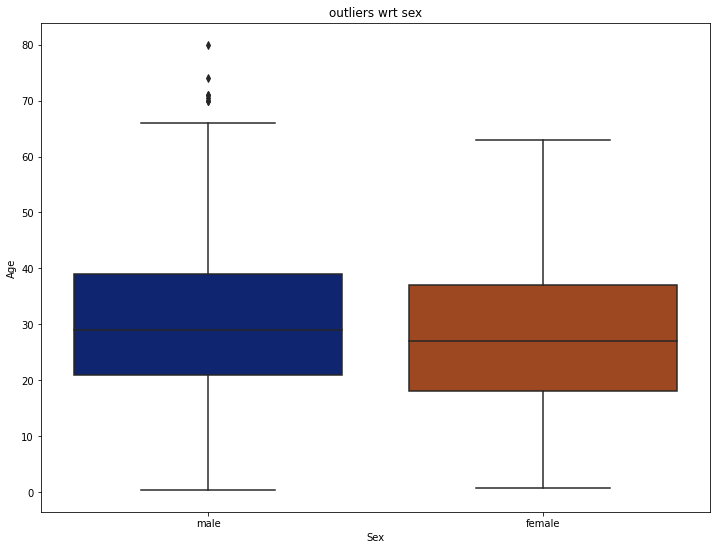

In [43]:
sns.set_palette('dark')
plt.figure(figsize=(12,9))
sns.boxplot(x='Sex', y='Age', data=train_data_copy)
plt.title('outliers wrt sex')
plt.show()

In [44]:
train_data_copy['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

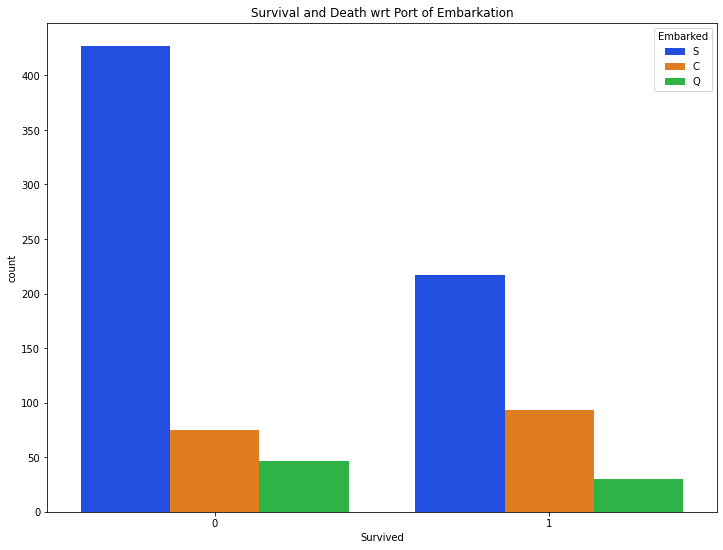

In [45]:
sns.set_palette('bright')
plt.figure(figsize=(12,9))
plt.title('Survival and Death wrt Port of Embarkation')
sns.countplot(x='Survived', hue='Embarked', data=train_data_copy)
plt.show()

Survival and Death wrt Embarked

In [46]:
train_data_copy.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [47]:
train_data_copy['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [48]:
train_data_copy['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

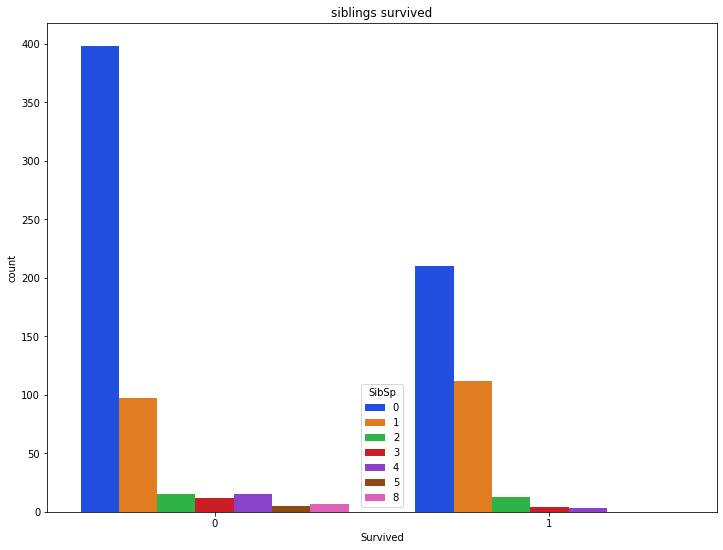

In [49]:
plt.figure(figsize=(12,9))
sns.countplot(x='Survived', hue='SibSp', data=train_data_copy)
plt.title('siblings survived')
plt.show()

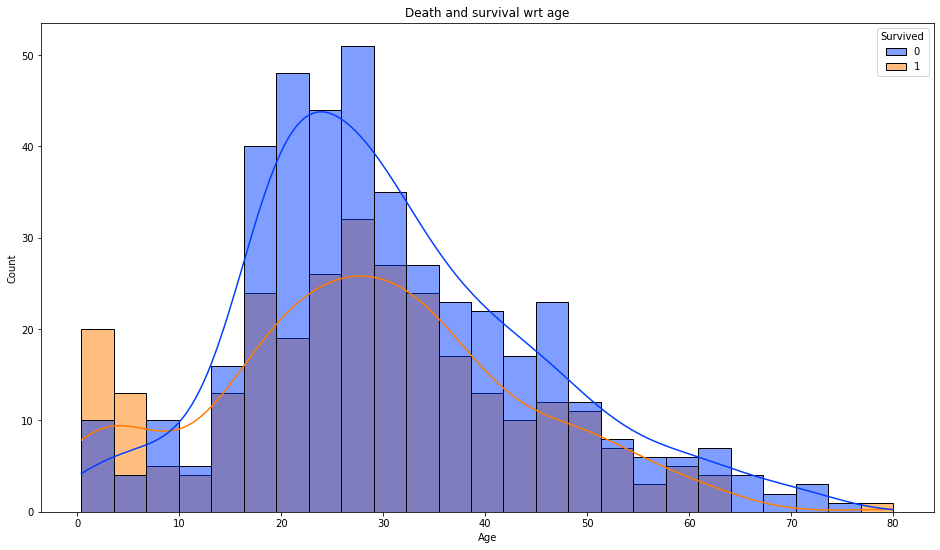

In [50]:
fig, ax1 = plt.subplots(figsize=(16, 9))
sns.set_palette('bright')
sns.histplot(data = train_data_copy, x='Age', ax=ax1, bins=25, hue='Survived', kde=True)
plt.title('Death and survival wrt age')
plt.show()

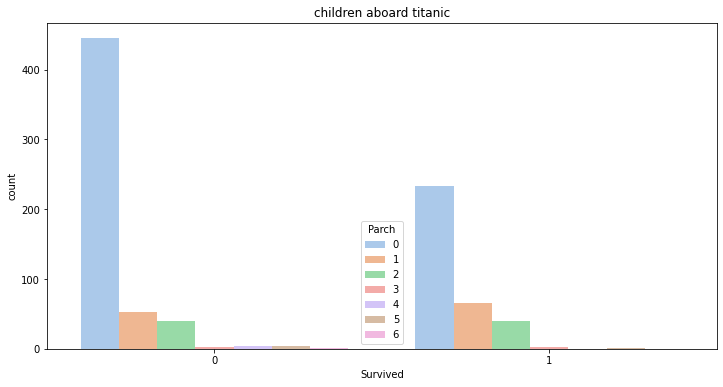

In [51]:
sns.set_palette('pastel')
plt.figure(figsize=(12,6))
sns.countplot(x='Survived', hue='Parch', data=train_data_copy)
plt.title('children aboard titanic')
plt.show()

In [52]:
survived = train_data['Survived'].value_counts()
print(survived)

0    549
1    342
Name: Survived, dtype: int64


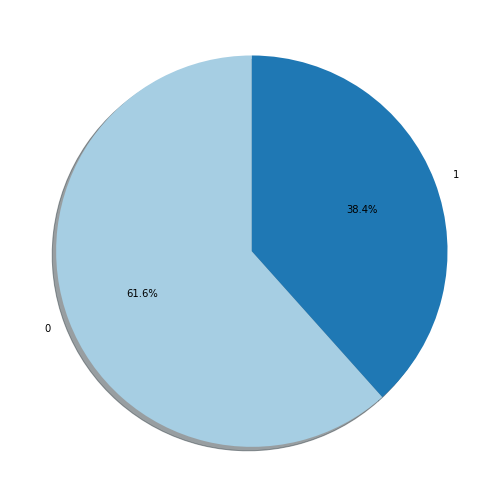

In [53]:
labels=survived.index
sizes=survived.values
plt.figure(figsize=(12,9))
colors = sns.color_palette('Paired')
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True,colors=colors,startangle=90)
plt.show()

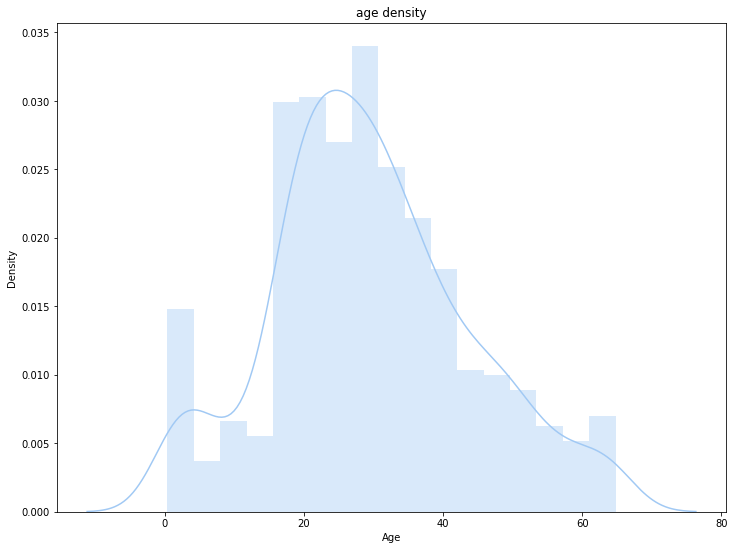

In [54]:
plt.figure(figsize=(12,9))
sns.distplot(train_data['Age'])
plt.title('age density')
plt.show()

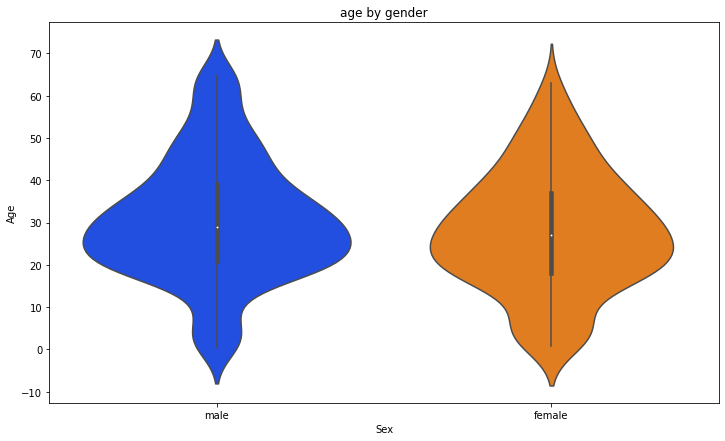

In [55]:
plt.figure(figsize=(12,7))
sns.set_palette('bright')
sns.violinplot(x=train_data['Sex'],y=train_data['Age'])
plt.title('age by gender')
plt.show()

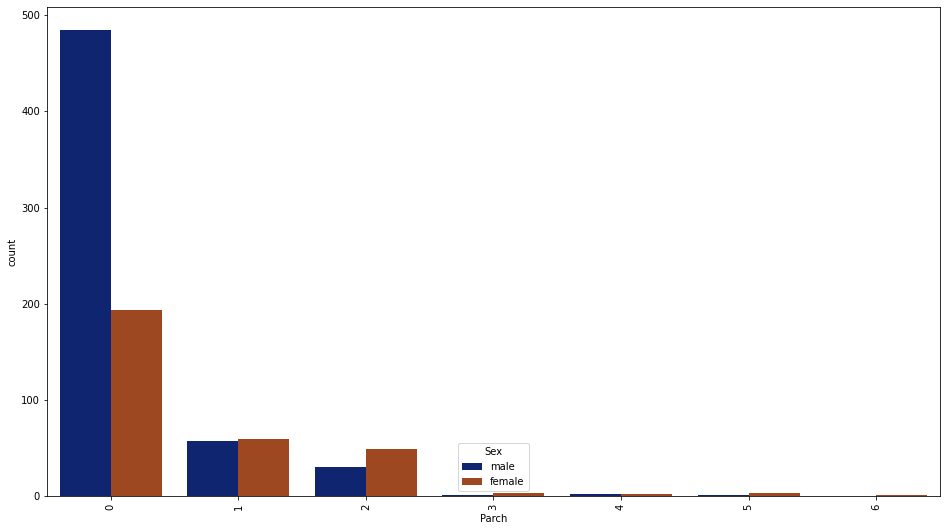

In [56]:
sns.set_palette('dark')
plt.figure(figsize=(16,9))
sns.countplot(x='Parch', hue='Sex', data=train_data)
plt.xticks(rotation=90)
plt.show()

In [57]:
corr = train_data_copy.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


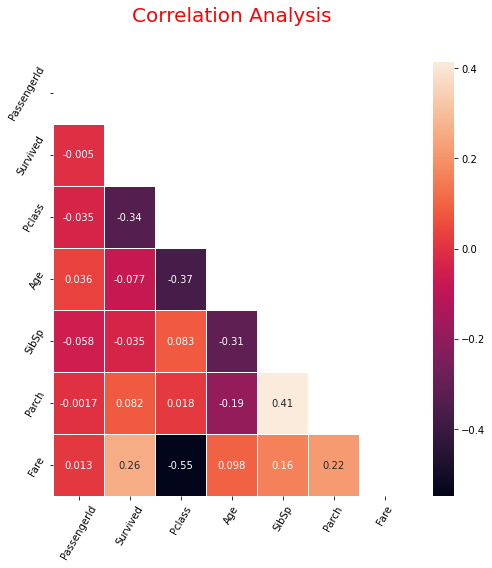

In [58]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(train_data.corr(), mask=mask, annot=True, linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

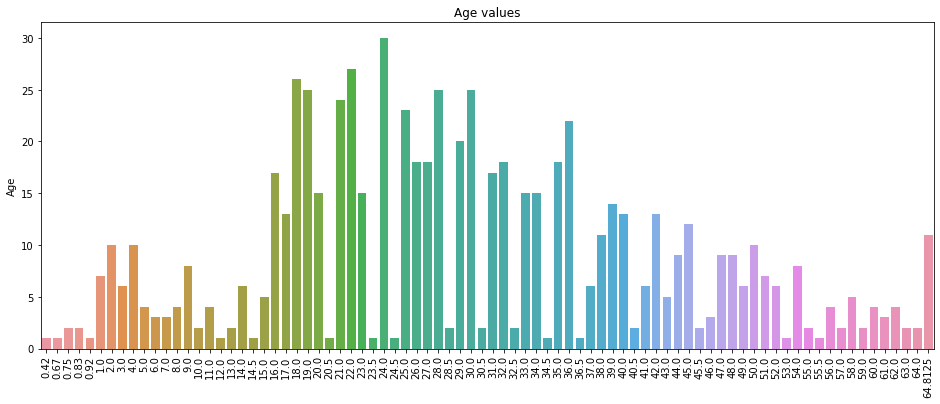

In [59]:
plt.figure(figsize=(16, 6))
sns.barplot(x=train_data['Age'].value_counts().index, y=train_data['Age'].value_counts())
plt.title('Age values')
plt.xticks(rotation=90)
plt.show()

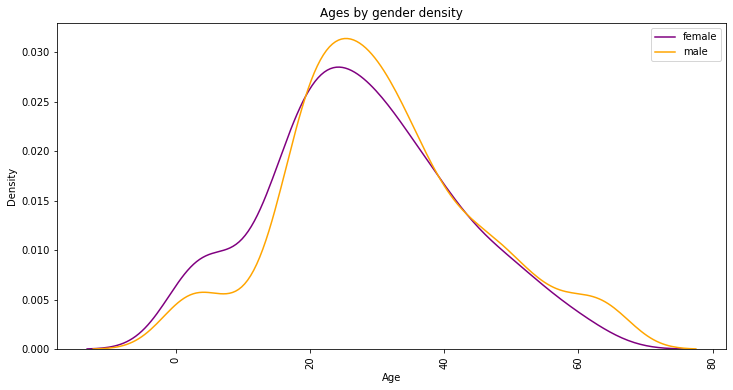

In [60]:
plt.figure(figsize=(12,6))
sns.kdeplot(train_data[train_data['Sex']=='female']['Age'], color='purple', label='female')
sns.kdeplot(train_data[train_data['Sex']=='male']['Age'], color='orange', label='male')
plt.title('Ages by gender density')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

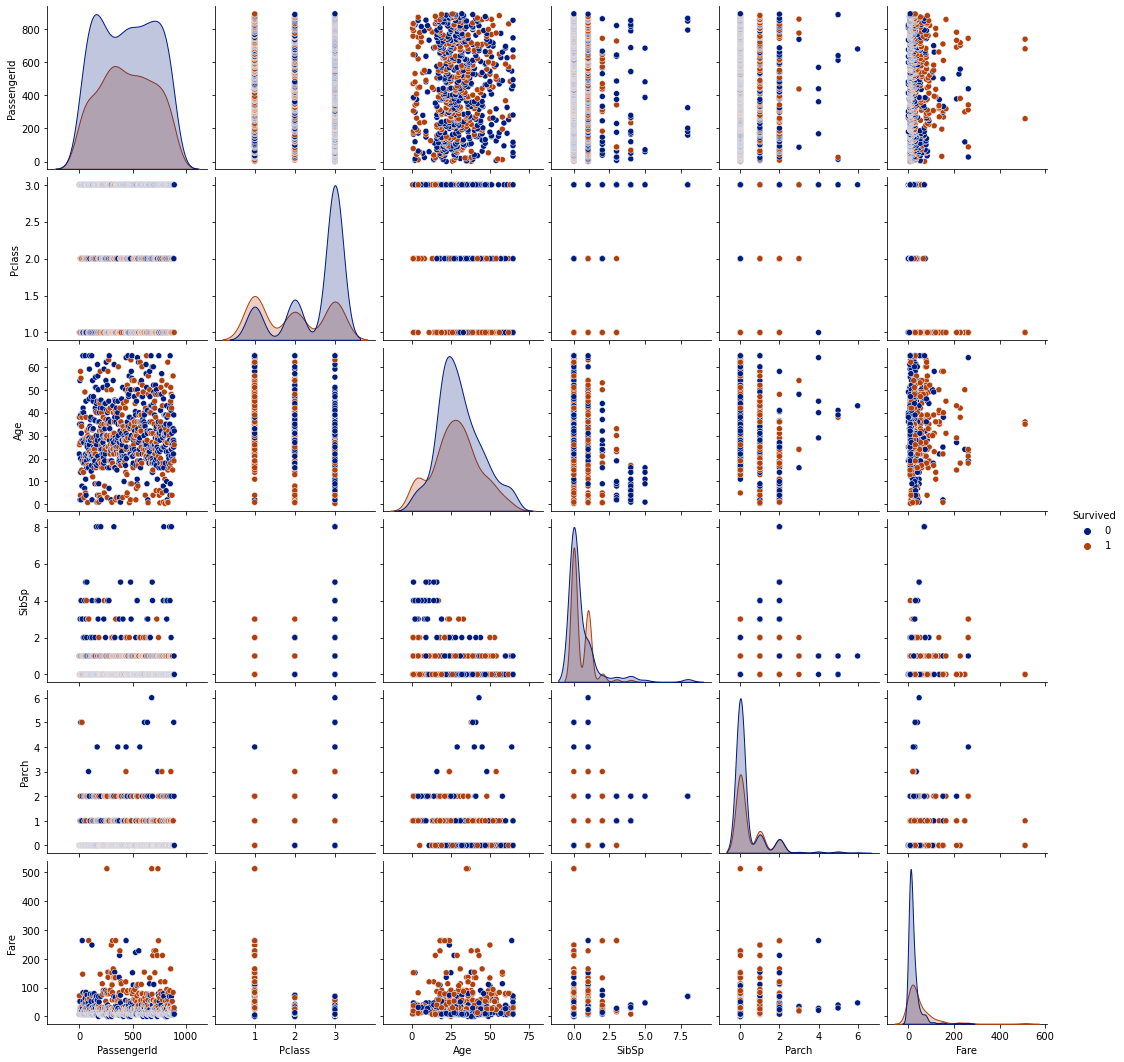

In [61]:
sns.pairplot(train_data, hue = 'Survived')

In [62]:
numerical = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

categories = ['Sex', 'Embarked']

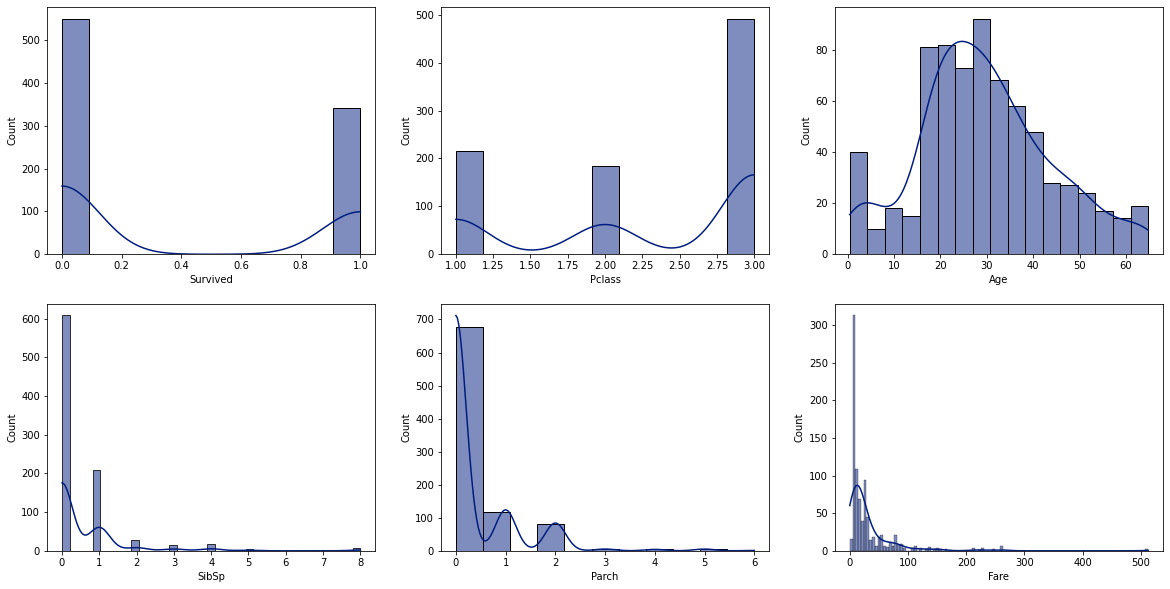

In [63]:
fig, ax = plt.subplots(2,3, figsize = (20,10))

for variable, subplot in zip(numerical, ax.flatten()):
    
    sns.histplot(train_data[variable],kde = True, ax = subplot)

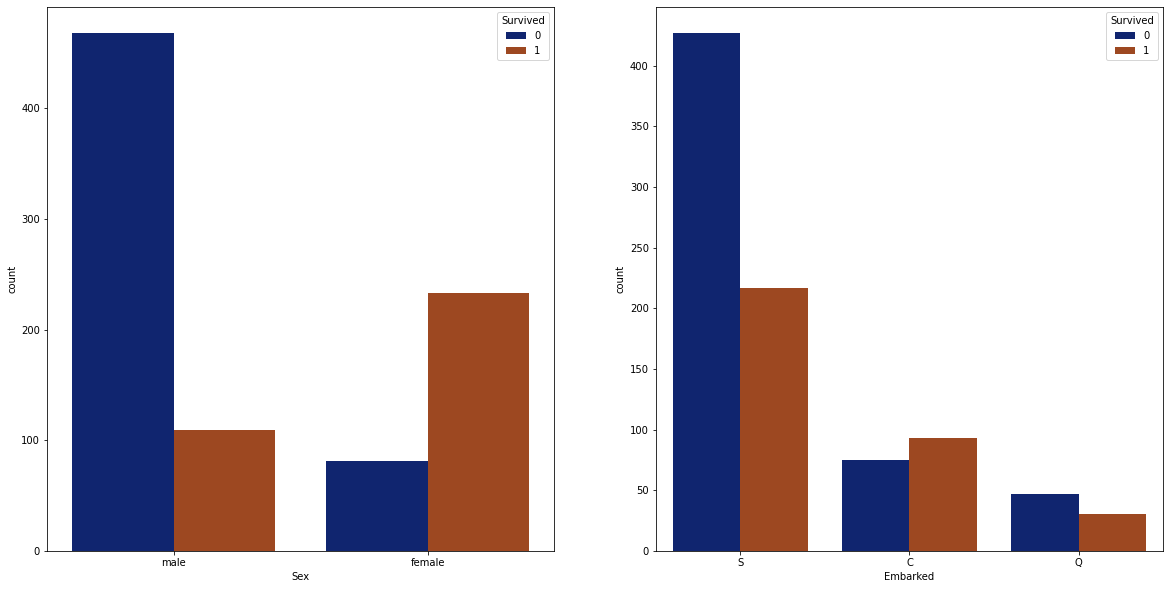

In [64]:
fig, ax = plt.subplots(1,2, figsize = (20, 10))

for variable, subplot in zip(categories, ax.flatten()):
    
    sns.countplot(x = variable, ax = subplot, hue = 'Survived', data = train_data)

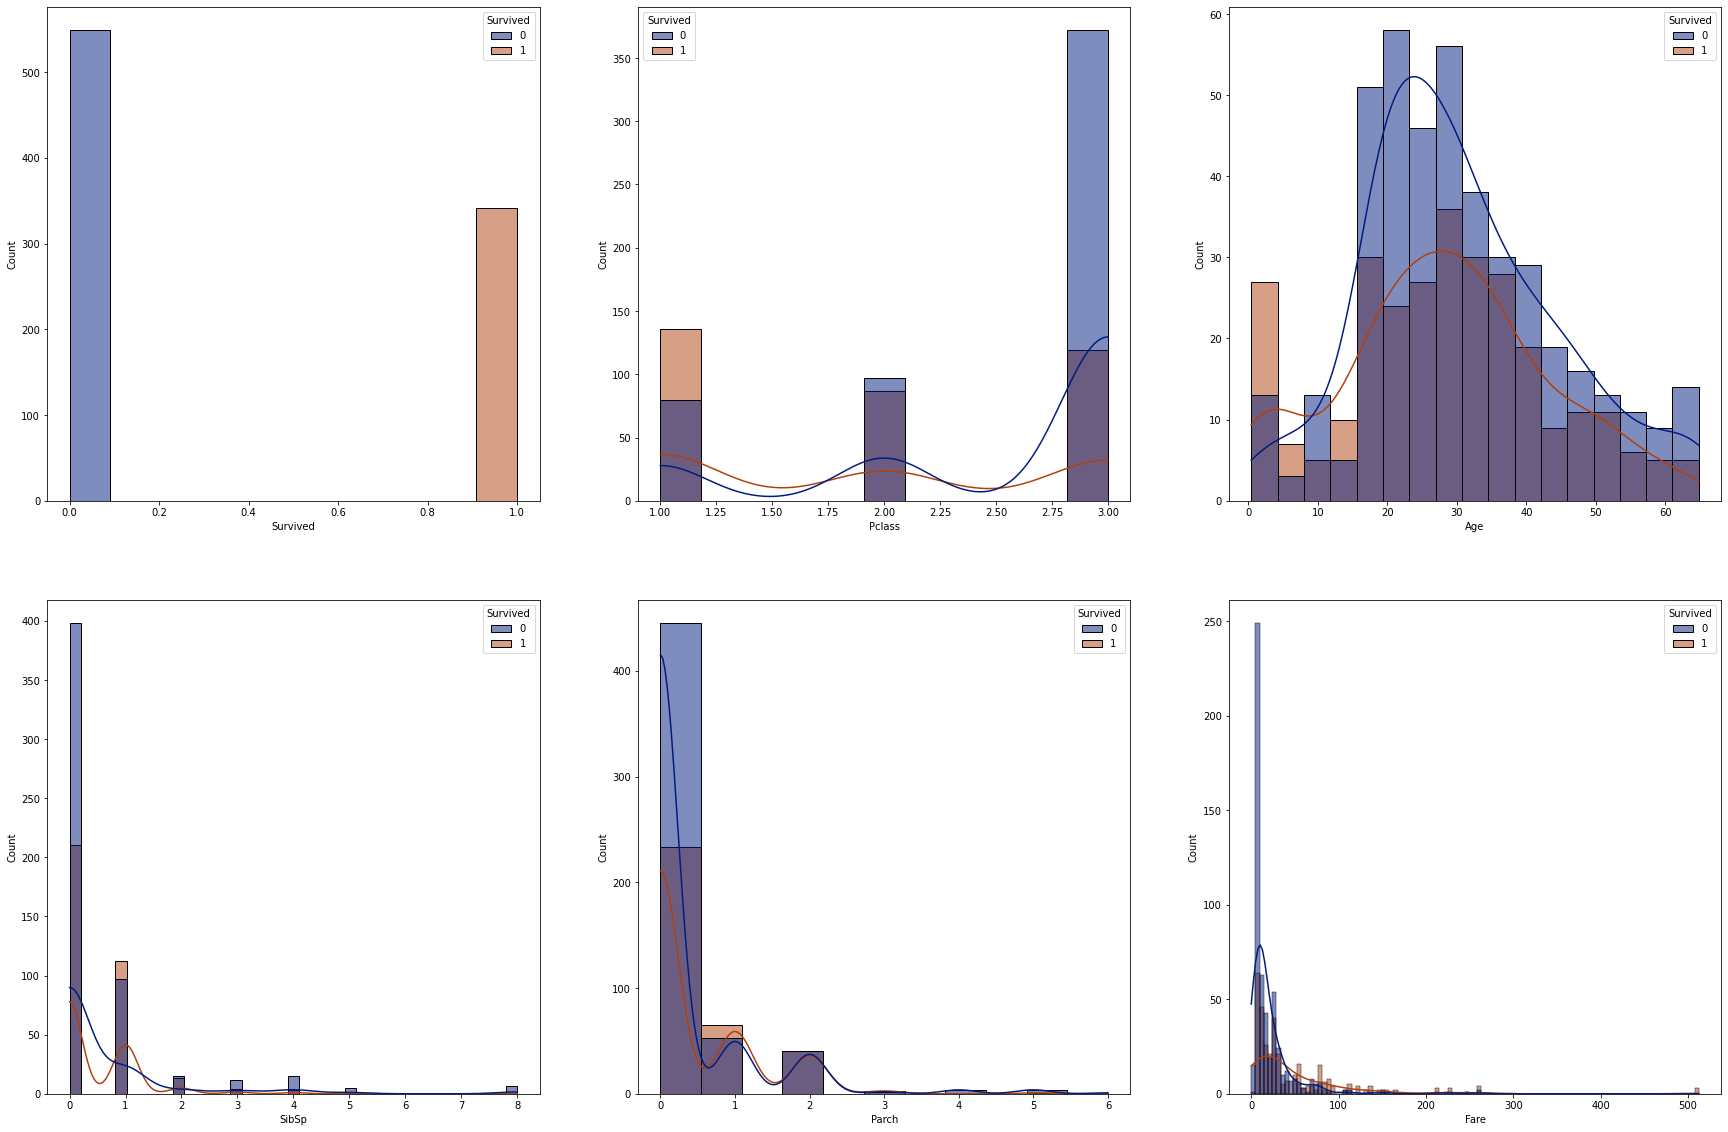

In [65]:
fig, ax = plt.subplots(2,3, figsize = (30, 20))

for variable, subplots in zip(numerical, ax.flatten()):
    
    sns.histplot(x = variable, data = train_data, hue = 'Survived',kde = True, ax = subplots)

## Conclusion from Above plots

1. Pclass 3 has low survival rate

2. age b/w 20 and 50 have more values and lesser survival rate than other age groups

3. SibSp (Sibling and spouses) 0 and Parch (Parents and child) 0 have greater count but low survival rate

4. SibSp, Parch, Fare and Age have outliers

# **Random Forest Model**
With 100 Trees, Output is taken as the avg of predictions

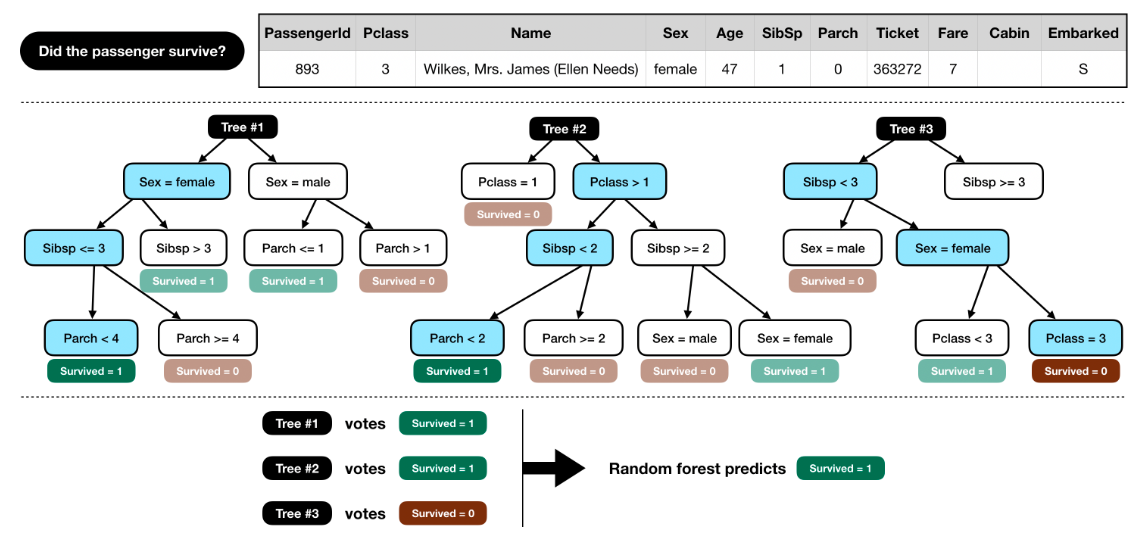

cell below looks for patterns in columns ["Pclass", "Sex", "SibSp", and "Parch"] of data. Constructs trees in random forest model based on patterns in the train.csv file, b4 generating predictions for passengers in test.csv. 

Code saves new predictions in a CSV file **rf_submission.csv.**

[about '`get_dummies()`' method](https://www.w3resource.com/pandas/get_dummies.php#:~:text=The%20get_dummies()%20function%20is,variable%20into%20dummy%2Findicator%20variables.&text=Data%20of%20which%20to%20get%20dummy%20indicators.&text=String%20to%20append%20DataFrame%20column%20names.&text=If%20appending%20prefix%2C%20separator%2Fdelimiter%20to%20use.)

In [66]:
from sklearn.ensemble import RandomForestClassifier

y = train_data['Survived']

features = ["Pclass", "Sex", "SibSp", "Parch"]
# converts categorical data into dummy/indicator data 
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# maximum depth of tree = 5
# number of trees = 100
# defining model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# fitting model
model.fit(X, y)
# predicting on test data
predictions = model.predict(X_test)

In [67]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('rf_submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


---